## Carregando a imagem a ser manipulada

In [18]:
# Função que permite a visualização da imagem
def showImg(image):
  plt.imshow(image)
  plt.axis("off")
  plt.show()

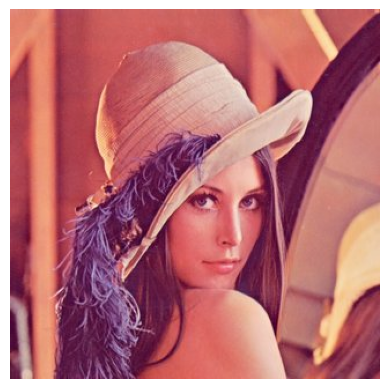

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/lena.jpg')
showImg(img)

## Imagem em tons de cinza, baseado na média dos valores RGB

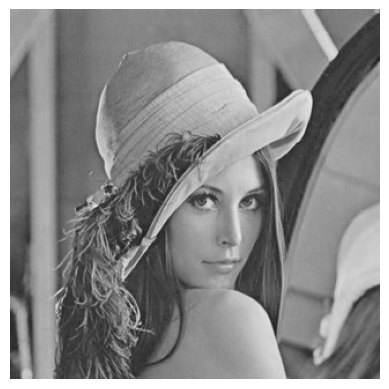

In [20]:
import numpy as np

# Obtendo a media entre os canais RGB
img_mean = np.mean(img, axis=2)

# Deixando todos os canais com o mesmo valor
img_mean = img_mean.astype(np.float32) / 255.0
img_gray = np.stack((img_mean,)*3, axis=-1)

showImg(img_gray)

## Imagem em tons de preto ou branco

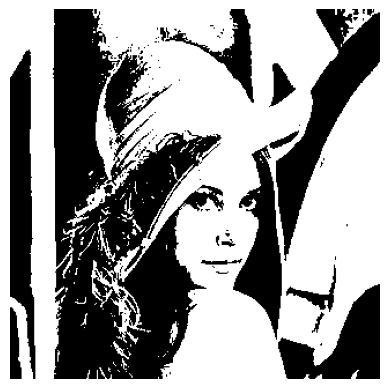

In [21]:
mask = img_mean > 0.5
img_binary = np.zeros_like(img_gray)
img_binary[mask] = 1

showImg(img_binary)

## Comparação entre as imagens geradas com as imagens pré-processadas com o auxilio da OpenCV

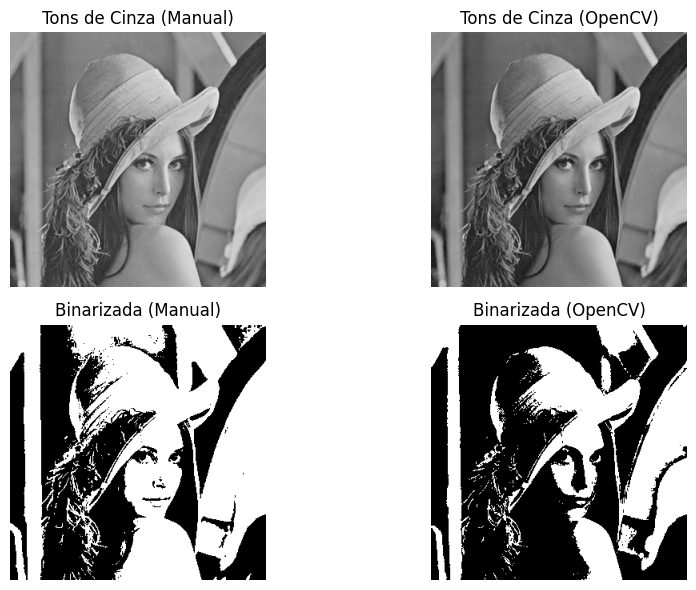

In [17]:
import cv2

# Tons de cinza usando OpenCV
img_gray_cv = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Binarização usando OpenCV
_, img_binary_cv = cv2.threshold(img_gray_cv, 127, 255, cv2.THRESH_BINARY)

img_gray_cv = cv2.cvtColor(img_gray_cv, cv2.COLOR_GRAY2RGB) / 255.0
img_binary_cv = cv2.cvtColor(img_binary_cv, cv2.COLOR_GRAY2RGB) / 255.0

# Exibir as imagens para comparação
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.title("Tons de Cinza (Manual)")
plt.imshow(img_gray)
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Tons de Cinza (OpenCV)")
plt.imshow(img_gray_cv)
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Binarizada (Manual)")
plt.imshow(img_binary)
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("Binarizada (OpenCV)")
plt.imshow(img_binary_cv)
plt.axis("off")

plt.tight_layout()
plt.show()

São bem notáveis as diferenças entre as imagens geradas com o auxilio da OpenCV e as geradas manualmente. Pesquisando mais afundo, isso pode ter ocorrido pois nas imagens de modo manual foi considerado apenas a média aritmética entre os valores dos canais, enquanto as funções da biblioteca OpenCV utilizam outros métodos como a média ponderada, baseado na percepção humana das cores.